In [1]:
import matplotlib.pyplot as plt
import os
# os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-21'
from straindesign import compress_model, remove_dummy_bounds
import cobra
import logging
logging.basicConfig(level=logging.INFO)
import cobra
import numpy as np

In [3]:
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [4]:
import straindesign as sd
import straindesign.names as names

In [5]:
from syn_elong import model
from syn_elong.media import min_media

Set parameter Username


INFO:gurobipy.gurobipy:Set parameter Username


Set parameter GURO_PAR_SPECIAL


INFO:gurobipy.gurobipy:Set parameter GURO_PAR_SPECIAL


Set parameter TokenServer to value "leghorn"


INFO:gurobipy.gurobipy:Set parameter TokenServer to value "leghorn"


In [6]:
with model:
    print(model.slim_optimize())

0.05390186774577662


In [7]:
with model:
    model.medium = min_media
    print(model.slim_optimize())

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


4.088280273582626


In [12]:
with model:
    model.medium = min_media
    sol = sd.fba(model, obj='BIOMASS__1', obj_sense='max', pfba =False)
    print(f"Maximum possible BIOMASS__1 synthesis rate: {sol.objective_value}.")
    sol = sd.fba(model, obj='EX_sucr_e', obj_sense='max', pfba =False)
    print(f"Maximum possible EX_sucr_e synthesis rate: {sol.objective_value}.")


INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


Maximum possible BIOMASS__1 synthesis rate: 4.088280273582666.
Maximum possible EX_sucr_e synthesis rate: 16.389121923937367.


In [ ]:
model.medium = min_media

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


In [18]:
rxn_cost = {}
for rxn in model.reactions:
    if rxn.id.startswith('EX_') or rxn.id.startswith('BIOMASS_') or\
            rxn.id.startswith('SK_') or rxn.id.startswith('PHOA') or\
            rxn.id.startswith('DM_') or rxn.id.startswith('SK_'):
        continue
    if rxn.gene_reaction_rule == '':
        continue
    else:
        # print(rxn.id)
        rxn_cost[rxn.id] = 1
sorted(rxn_cost)

['3HAD100',
 '3HAD120',
 '3HAD140',
 '3HAD160',
 '3HAD180',
 '3HAD40_2',
 '3HAD60',
 '3HAD80',
 '3OAR100',
 '3OAR120',
 '3OAR140',
 '3OAR160',
 '3OAR180',
 '3OAR40_2',
 '3OAR60',
 '3OAR80',
 '3OAS100',
 '3OAS120',
 '3OAS140',
 '3OAS160',
 '3OAS180',
 '3OAS60',
 '3OAS80',
 '4PCP',
 '4PEPTabcpp',
 'A5PISO',
 'AACPS6',
 'ACBIPGT',
 'ACCOAC',
 'ACGAMK',
 'ACGAMT',
 'ACGK',
 'ACGS',
 'ACHBSb',
 'ACKr',
 'ACLSa',
 'ACLSb',
 'ACM6PH',
 'ACMAMT',
 'ACOATA',
 'ACODA',
 'ACONT',
 'ACOTA',
 'ACS',
 'ADCL',
 'ADCPS2',
 'ADCS',
 'ADCYRS',
 'ADK1',
 'ADMDC',
 'ADOCBLS',
 'ADPGLC',
 'ADPT',
 'ADSK',
 'ADSL1r',
 'ADSL2r',
 'ADSS',
 'AFAT',
 'AGDC',
 'AGDI_1',
 'AGM3PApp',
 'AGM3PH',
 'AGM4PA',
 'AGM4PApp',
 'AGM4PCP',
 'AGM4PH',
 'AGMH',
 'AGPAT160',
 'AGPAT161',
 'AGPATACP_HDE_PALM',
 'AGPATACP_OLE_HDE',
 'AGPATACP_OLE_PALM',
 'AGPR',
 'AGTi',
 'AHCi',
 'AHSERL2_1',
 'AICART',
 'AIRC2',
 'AIRC3',
 'ALAALAD',
 'ALAALAabcpp',
 'ALAALAr',
 'ALAD_L',
 'ALAGLUE',
 'ALAR',
 'ALATRS',
 'ALCD1',
 'ALCD19',
 

In [29]:
model.summary()

INFO:cobra.summary.model_summary:Generating new parsimonious flux distribution.


Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,77.95,1,43.80%
cobalt2_e,EX_cobalt2_e,2.092E-05,0,0.00%
fe3_e,EX_fe3_e,0.006549,0,0.00%
h_e,EX_h_e,69.13,0,0.00%
hco3_e,EX_hco3_e,100,1,56.20%
k_e,EX_k_e,6.325E-06,0,0.00%
mg2_e,EX_mg2_e,0.04583,0,0.00%
na1_e,EX_na1_e,4.865E-07,0,0.00%
nh4_e,EX_nh4_e,32.95,0,0.00%
photon510_e,EX_photon510_e,13.46,0,0.00%


In [30]:
fluxes = model.optimize().fluxes
fluxes = fluxes[np.abs(fluxes)>0]

In [33]:
ex = [i for i in fluxes.index if i.startswith('EX_')]
fluxes.loc[ex].sort_values()

EX_photon690_e   -1000.000
EX_photon670_e   -1000.000
EX_hco3_e         -100.000
EX_co2_e           -77.949
EX_h_e             -69.129
EX_nh4_e           -32.949
EX_photon470_e     -13.457
EX_pi_e             -1.744
EX_so4_e            -0.637
EX_mg2_e            -0.046
EX_photon650_e      -0.046
EX_fe3_e            -0.007
EX_cobalt2_e        -0.000
EX_k_e              -0.000
EX_na1_e            -0.000
EX_sucr_e            0.011
EX_h2o_e             9.316
EX_o2_e            194.131
Name: fluxes, dtype: float64

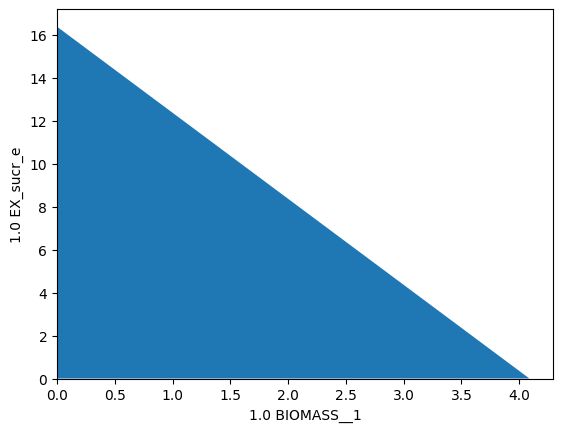

In [34]:
datapoints, triang, plot1 = sd.plot_flux_space(
    model,
    ('BIOMASS__1','EX_sucr_e'),
    show=False
);

In [35]:
blocked_reactions = cobra.flux_analysis.find_blocked_reactions(model)
len(blocked_reactions)

In [37]:
consistent_model = cobra.flux_analysis.fastcc(model)
cobra.io.write_sbml_model( consistent_model, 'condensed_syn.xml',)

Read LP format model from file C:\Users\pino216\AppData\Local\Temp\tmpm59iakji.lp


INFO:gurobipy.gurobipy:Read LP format model from file C:\Users\pino216\AppData\Local\Temp\tmpm59iakji.lp


Reading time = 0.03 seconds


INFO:gurobipy.gurobipy:Reading time = 0.03 seconds


: 893 rows, 1952 columns, 7974 nonzeros


INFO:gurobipy.gurobipy:: 893 rows, 1952 columns, 7974 nonzeros


In [38]:
consistent_model.summary(fva=.9)

INFO:cobra.summary.model_summary:Generating new parsimonious flux distribution.
INFO:cobra.summary.model_summary:Performing flux variability analysis.


Metabolite,Reaction,Flux,Range,C-Number,C-Flux
co2_e,EX_co2_e,77.95,[60.17; 100],1,43.80%
cobalt2_e,EX_cobalt2_e,2.092E-05,[1.883E-05; 2.076E-05],0,0.00%
fe3_e,EX_fe3_e,0.006549,[0.005894; 0.006549],0,0.00%
h_e,EX_h_e,69.13,[32.37; 100],0,0.00%
hco3_e,EX_hco3_e,100,[60.17; 100],1,56.20%
k_e,EX_k_e,6.325E-06,[5.692E-06; 6.325E-06],0,0.00%
mg2_e,EX_mg2_e,0.04583,[0.04125; 0.04583],0,0.00%
na1_e,EX_na1_e,4.865E-07,[4.379E-07; 4.865E-07],0,0.00%
nh4_e,EX_nh4_e,32.95,[15.11; 32.95],0,0.00%
photon470_e,EX_photon470_e,13.46,[0; 1000],0,0.00%


In [39]:
consistent_model.slim_optimize()

4.088280273582658

In [40]:
model.slim_optimize()

4.088280273582654

In [41]:
for rxn in consistent_model.metabolites.sucr_c.reactions:
    print(rxn)
    # print(consistent_model.reactions.get_by_id(rxn.id))

SPP: h2o_c + suc6p_c --> pi_c + sucr_c
SUCRt2: h_e + sucr_e <=> h_c + sucr_c
SUCR: h2o_c + sucr_c --> fru_c + glc__D_c


In [42]:
consistent_model.metabolites.suc6p_c

Metabolite identifier,suc6p_c
Name,Sucrose 6-phosphate
Memory address,0x01babb3f1330
Formula,C12H21O14P
Compartment,c
In 2 reaction(s),"SPP, SPS"


In [ ]:
for rxn in consistent_model.metabolites.suc6p_c.reactions:
    print(rxn)

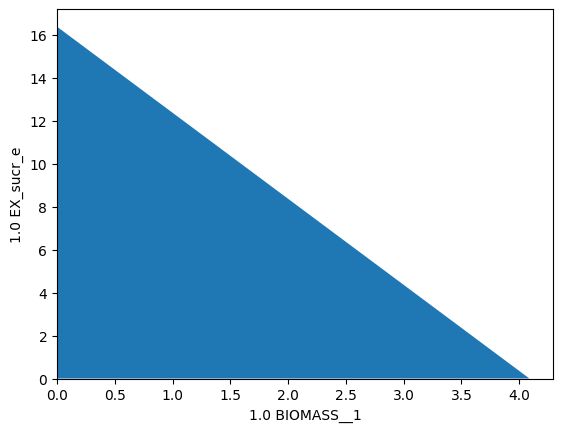

In [44]:

datapoints, triang, plot1 = sd.plot_flux_space(
    consistent_model,
    ('BIOMASS__1','EX_sucr_e'),
    show=False
);

In [45]:
module_optknock = sd.SDModule(
    consistent_model,
    names.OPTKNOCK,
    inner_objective='BIOMASS__1',
    outer_objective='EX_sucr_e',
    constraints=['EX_sucr_e >= 5', 'BIOMASS__1 >= 1.']
)

In [52]:
import logging
logging.basicConfig(level=logging.INFO)

sols = sd.compute_strain_designs(
    consistent_model,
    sd_modules = module_optknock,
    max_solutions = 1,
    max_cost = 3,
    solution_approach = 'best',
    time_limit=300,

)
reaction_sd = sols.reaction_sd

INFO:root:Preparing strain design computation.
INFO:root:  Using gurobi for solving LPs during preprocessing.
INFO:root:  FVA to identify blocked reactions and irreversibilities.
INFO:root:  FVA(s) to identify essential reactions.
INFO:root:Compressing Network (740 reactions).
INFO:root:  Removing blocked reactions.
INFO:root:  Translating stoichiometric coefficients to rationals.
INFO:root:  Removing conservation relations.
INFO:root:  Compression 1: Applying compression from EFM-tool module.
INFO:root:  Reduced to 240 reactions.
INFO:root:  Compression 2: Lumping parallel reactions.
INFO:root:  Last step could not reduce size further (240 reactions).
INFO:root:  Network compression completed. (1 compression iterations)
INFO:root:  Translating stoichiometric coefficients back to float.
INFO:root:  FVA(s) in compressed model to identify essential reactions.
INFO:root:Finished preprocessing:
INFO:root:  Model size: 240 reactions, 138 metabolites
INFO:root:  172 targetable reactions
INFO

In [ ]:
import networkx as nx

In [91]:
reaction_sd

[{'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0},
 {'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0},
 {'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0},
 {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0},
 {'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0},
 {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0},
 {'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0},
 {'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0},
 {'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0}]

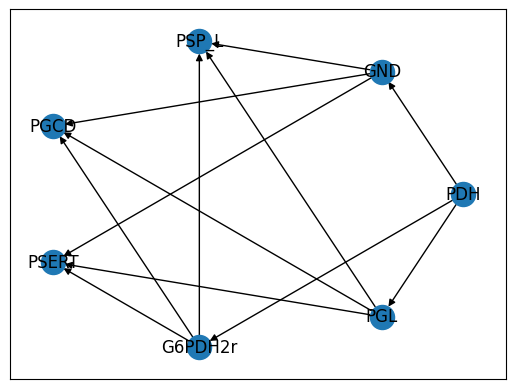

In [57]:
rxn_graph = nx.DiGraph()
for i in reaction_sd:
    prev = None
    for j in i:
        if prev is not None:
            rxn_graph.add_edge(prev, j)
        prev = j
            
#     print(i)
nx.draw_networkx(rxn_graph, pos=nx.layout.kamada_kawai_layout(rxn_graph, rxn_graph.nodes))
#nx.write_gml(rxn_graph, 'reaction_graph.gml')

In [ ]:
reaction_sd2 = [
     {'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0},
     {'GART': -1.0, 'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PGCD': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'GND': -1.0, 'PSERT': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSP_L': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PGCD': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'G6PDH2r': -1.0, 'PSERT': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSP_L': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PGCD': -1.0, 'SFGTHi': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0, 'FALGTHLs': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0, 'FALDH2': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0, 'ALCD1': -1.0},
     {'PDH': -1.0, 'PGL': -1.0, 'PSERT': -1.0, 'SFGTHi': -1.0}
]

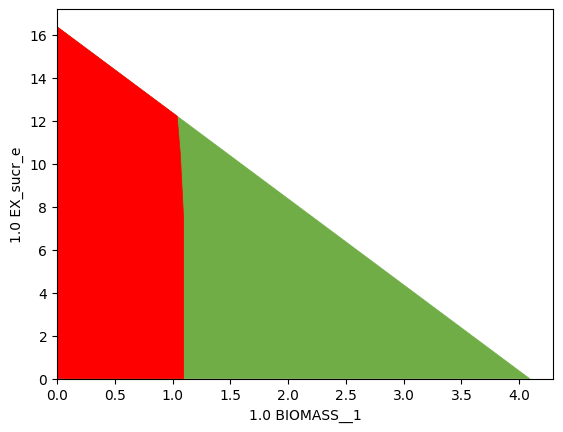

In [69]:
datapoints, triang, plot1 = sd.plot_flux_space(
    consistent_model,
    ('BIOMASS__1', 'EX_sucr_e'),
    show=False
);

plot1.set_facecolor('#70AD47')
plot1.set_edgecolor('#70AD47')

# OptKnock design plot
#     interventions = [[{s:1.0},'=',0.0] for rxn in reaction_sd for s,v in rxn.items() if v < 1]
# interventions = [[{s:1.0},'=', 0.0] for s,v in reaction_sd[0].items() if v < 1]
_, _,plot3 = sd.plot_flux_space(
    consistent_model,
    ('BIOMASS__1', 'EX_sucr_e'),
    # The sign of the glucose exchange reaction is flipped since
    # reaction is defined in the direction of secretion.
    constraints=interventions,
    show=False
);
plot3.set_facecolor('red')
plot3.set_edgecolor('red')
# adjust axes limits and show plot
plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

In [82]:
def view_with_changes(changed_model):
    datapoints, triang, plot1 = sd.plot_flux_space(
        consistent_model,
        ('BIOMASS__1', 'EX_sucr_e'),
        show=False
    );

    plot1.set_facecolor('green')
    plot1.set_edgecolor('green')

    _, _,plot3 = sd.plot_flux_space(
        changed_model,
        ('BIOMASS__1', 'EX_sucr_e'),
        show=False
    );
    plot3.set_facecolor('red')
    plot3.set_edgecolor('red')
    # adjust axes limits and show plot
    plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
    plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
    plt.show()

In [67]:
#print(interventions)
rxn_to_remove = set()
for i in sols.reaction_sd:
    for j in i:
        rxn_to_remove.add(j)
print(rxn_to_remove)

{'PSP_L', 'PSERT', 'GND', 'PGCD', 'G6PDH2r', 'PDH', 'PGL'}


In [ ]:
rxn_to_remove2 = {
    'PSERT', 'ALCD1', 'PGL', 'SFGTHi',
    'G6PDH2r', 'FALDH2', 
    'PSP_L', 'GART', 'PGCD', 
    'GND', 'FALGTHLs', 'PDH'
}
rxn_to_remove2

In [86]:
rxn = model.reactions.get_by_id('GART')
print({gene.id for gene in rxn.genes})

{'SYNPCC7942_RS03015'}


In [92]:
genes_to_ko = set()
for i in rxn_to_remove:
    rxn = model.reactions.get_by_id(i)
    print(i, {gene.id for gene in rxn.genes})
    for gene in rxn.genes:
        genes_to_ko.add(gene.id)
# genes_to_ko

PSP_L {'SYNPCC7942_RS02470'}
PSERT {'SYNPCC7942_RS00970'}
GND {'SYNPCC7942_RS00195'}
PGCD {'SYNPCC7942_RS07670'}
G6PDH2r {'SYNPCC7942_RS11865'}
PDH {'SYNPCC7942_RS09865', 'SYNPCC7942_RS05480', 'SYNPCC7942_RS06135', 'SYNPCC7942_RS00725'}
PGL {'SYNPCC7942_RS02690'}


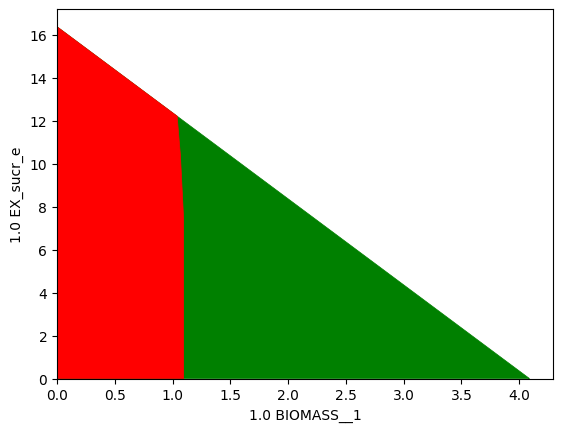

In [93]:
with model:
    # {'PDH': -1.0, 'GND': -1.0, 'PSP_L': -1.0},
    for i in {'SYNPCC7942_RS09865', 'SYNPCC7942_RS05480', 'SYNPCC7942_RS06135', 'SYNPCC7942_RS00725'}:
        model.genes.get_by_id(i).knock_out()
    
    model.genes.get_by_id('SYNPCC7942_RS00195').knock_out()
    model.genes.get_by_id('SYNPCC7942_RS02470').knock_out()
    view_with_changes(model)
    

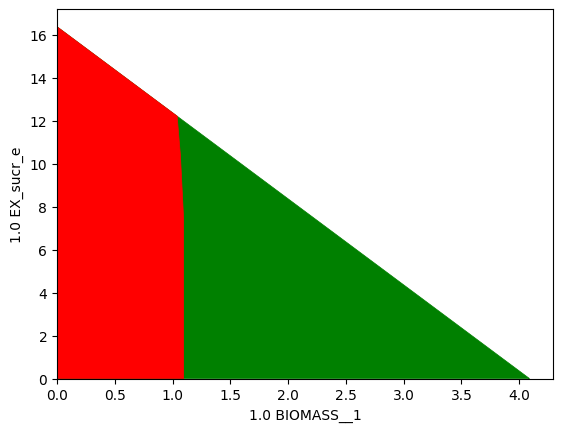

In [84]:
with model as model:
    for i in rxn_to_remove:
        model.remove_reactions([model.reactions.get_by_id(i)])
    view_with_changes(model)
    

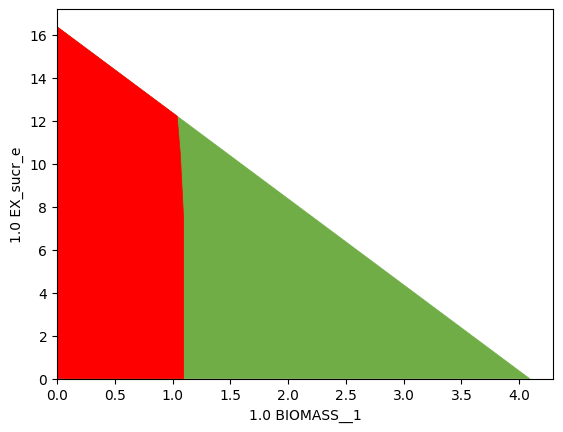

In [77]:
with model:
    for i in genes_to_ko:
        model.genes.get_by_id(i).knock_out()
    view_with_changes(model)

In [94]:
module_suppress = sd.SDModule(
    consistent_model,
    sd.names.SUPPRESS,
    constraints='EX_sucr_e >= 0.1'
)

module_protect  = sd.SDModule(
    consistent_model,
    sd.names.PROTECT,
    constraints='BIOMASS__1>=0.2'
)

In [99]:
# Compute strain designs
sols = sd.compute_strain_designs(
    consistent_model,
    sd_modules = [module_suppress, module_protect],
    time_limit = 300,
    max_solutions = 1,
    max_cost = 3,
    solution_approach = sd.names.ANY
)

# Print solutions
print(f"One compressed solution with cost {sols.sd_cost[0]} found and "+\
      f"expanded to {len(sols.reaction_sd)} solutions in the uncompressed netork.")
print(f"Example knockout set: {[s for s in sols.reaction_sd[0]]}")

INFO:root:Preparing strain design computation.
INFO:root:  Using gurobi for solving LPs during preprocessing.
INFO:root:  FVA to identify blocked reactions and irreversibilities.


Exception: Status code 12 not yet handeld.

In [43]:
cobra.io.save_json_model( model, 'name_for_now.json',)

In [34]:
import escher
from escher import Builder

In [35]:
builder = Builder()

In [40]:
builder.model = model

In [44]:
builder.metabolite_data = pfba_solution.shadow_prices
builder.reaction_data = pfba_solution.fluxes

In [42]:
builder

Builder(allow_building_duplicate_reactions=False, and_method_in_gene_reaction_rule='mean', cofactors=['atp', '…

In [58]:
with model:
    model.objective = {model.reactions.get_by_id('EX_sucr_e'): 1, model.reactions.get_by_id('BIOMASS__1'):5}
    pfba_solution = cobra.flux_analysis.pfba(model)
builder.metabolite_data = pfba_solution.shadow_prices
builder.reaction_data = pfba_solution.fluxes

In [47]:
flux = pfba_solution.fluxes.to_dict()

## Auto escher map

This code is based on https://github.com/johncthomas/Auto-Escher-map-for-CobraPy.
It doesn't quite do the visualization as wanted, but I'll keep it here until I get a defined escher map working right.

In [45]:
import generate_emap

In [56]:
excluded_reactions = set(ex)

common_mets = set()
rxn_with_flux = set()
rxn_with_greater_flux = set()

threshold_flux = 1.1

# Get a list of reactions with flux and those where flux exceeds the threshold
# The rxn_with_flux will be used to determine what's a common metabolite
# rxn_with_greater flux used to draw the map
for rxn_name in flux:
    if flux[rxn_name] != 0 and rxn_name not in excluded_reactions:
        rxn = model.reactions.get_by_id(rxn_name)
        rxn_with_flux.add(rxn)
        if 0-threshold_flux > flux[rxn_name] or threshold_flux < flux[rxn_name]:
            rxn_with_greater_flux.add(rxn)

# Get a dictionary of metabolite frequency
# (keys are the Cobra metabolite objects)
met_count = generate_emap.metabolite_occurence(rxn_with_flux)

# Get common metabolites.
# included_common_m will be used be treated as uncommon whatever their occurence
included_common_m = ('accoa_c', 'pry_c', 'g3p_c', 'acald_c', 'f6p_c', 'pep_c')
for met in met_count:
    if met_count[met] > 25 and met.id not in included_common_m:
        common_mets.add(met)

# Convert the sets to lists so that they can be iterated over
common_mets, rxn_with_flux, rxn_with_greater_flux = \
    list(common_mets), list(rxn_with_flux), list(rxn_with_greater_flux)


# Get the Escher JSON
escher_map = generate_emap.gen_map(
     consistent_model, rxn_with_greater_flux,  common_mets, 400, met_count
)
escher_json = escher_map.dump_json()
# Currently Escher doesn't accept json strings, needs a file, i assume that's a bug
with open('escher.json', 'w') as f:
    f.write(escher_json)

Of 98 reactions 75 have a link
The following are only connected to other reactions by common intermediates
Modeling: demand reaction (succ c) [DM_succ_c]::  succ_c --> 
Nitrate exchange [EX_no3_e]::  no3_e <=> 
Nucleoside-diphosphate kinase (ATP:GDP) [NDPK1]::  atp_c + gdp_c <=> adp_c + gtp_c
Adenylate kinase [ADK1]::  amp_c + atp_c <=> 2.0 adp_c
Polyphosphate kinase [PPK]::  atp_c + pi_c <=> adp_c + ppi_c
Modeling: exchange reaction, photon absorption (680-700nm)  [EX_photon690_e]::  photon690_e <=> 
Modeling: exchange reaction, photon absorption (660nm-680nm)  [EX_photon670_e]::  photon670_e <=> 
H2O transport via diffusion (tilacoid) [H2Otu_syn]::  h2o_u <=> h2o_c
Modeling: exchange reaction, photon absorption (500nm-520nm) [EX_photon510_e]::  photon510_e <=> 
Acetate kinase [ACKr]::  ac_c + atp_c <=> actp_c + adp_c
Sucrose transport in via proton symport [SUCRt2]::  h_e + sucr_e <=> h_c + sucr_c
Sedoheptulose-bisphosphatase [SBP]::  h2o_c + s17bp_c --> pi_c + s7p_c
Unconnected coun

In [53]:
builder.hide_secondary_metabolites = True

In [54]:
rxn_to_remove

{'ALCD1',
 'FALDH2',
 'FALGTHLs',
 'G6PDH2r',
 'GART',
 'GND',
 'PDH',
 'PGCD',
 'PGL',
 'PSERT',
 'PSP_L',
 'SFGTHi'}

In [51]:
builder

Builder(allow_building_duplicate_reactions=False, and_method_in_gene_reaction_rule='mean', cofactors=['atp', '…